In [1]:
%cd '/Users/zhangpengyu/Desktop/EPC'

/Users/zhangpengyu/Desktop/EPC


### 1. Import packages

In [2]:
#基础
import numpy as np
from numpy import absolute,mean,std
import pandas as pd
import time

#绘图
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
%matplotlib inline

#模型
from sklearn.linear_model import Lasso, LassoCV, ElasticNet, ElasticNetCV, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
# import lightgbm as lgb
import xgboost as xgb

#模型相关
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

#忽略警告
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

### 2. Load dataset

In [3]:
train = pd.read_csv('2021_impact_train.csv')
test = pd.read_csv('2021_impact_test.csv')
print('The shape of training data:', train.shape)
print('The shape of testing data:', test.shape)

The shape of training data: (3659, 31)
The shape of testing data: (1000, 31)


In [4]:
train = train.fillna(train.mean())

In [5]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:,:-1],test.iloc[:, -1]

In [6]:
X_train = X_train.apply(lambda x: (x-np.min(x)) / (np.max(x)-np.min(x)))
X_test = X_test.apply(lambda x: (x-np.min(x)) / (np.max(x)-np.min(x)))

### 3. Regression

#### 3.1 LASSO Regression

In [14]:
lasso = Lasso(alpha=0.01, max_iter=1000000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=1000000)

In [15]:
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test,y_test)
print("LASSO Train Score: ", lasso_train_score)
print("LASSO Test Score: ", lasso_test_score)

LASSO Train Score:  0.6471919975050203
LASSO Test Score:  0.13947704216567136


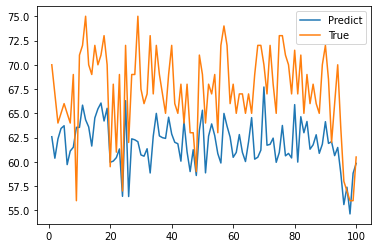

<Figure size 1440x432 with 0 Axes>

Mean Square Error: 41.41828958714069


In [16]:
num = 100
x = np.arange(1,num+1)
lasso_predict = lasso.predict(X_test)
plt.plot(x,lasso_predict[:num],label="Predict")
plt.plot(x,y_test[:num],label = "True")
plt.legend()
plt.figure(figsize=(20,6))
plt.show()
print("Mean Square Error:", mean_squared_error(lasso_predict,y_test))

#### 3.2 Ridge Regression

In [19]:
rr = Ridge(alpha=0.01)
rr.fit(X_train,y_train)

Ridge(alpha=0.01)

In [20]:
rr_train_score = rr.score(X_train, y_train)
rr_test_score = rr.score(X_test,y_test)
print("Train score: ", rr_train_score)
print("Test score: ", rr_test_score)

Train score:  0.6567858433672285
Test score:  0.42756548502634095


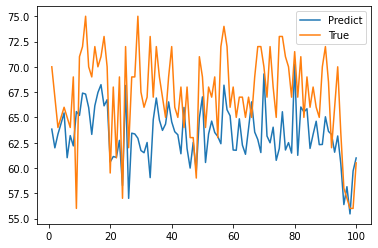

<Figure size 1440x432 with 0 Axes>

Mean Square Error: 27.55215104373547


In [21]:
num = 100
x = np.arange(1,num+1)
ridge_predict = rr.predict(X_test)
plt.plot(x,ridge_predict[:num],label="Predict")
plt.plot(x,y_test[:num],label = "True")
plt.legend()
plt.figure(figsize=(20,6))
plt.show()
print("Mean Square Error:", mean_squared_error(ridge_predict,y_test))

#### 3.3 XGBoost

In [6]:
#XGBoost
xgbr_params = {'learning_rate': 0.001,
      'n_estimators': 20000, 
      'max_depth': 7,
      'eta': 0.1,
      'subsample': 0.7,
      'colsample_bytree': 0.8}
xgbr = xgb.XGBRegressor(**xgbr_params)

In [7]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:,:-1],test.iloc[:, -1]

In [8]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.001, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20000,
             n_jobs=None, num_parallel_tree=None, ...)

In [9]:
train_score = xgbr.score(X_train, y_train)
test_score = xgbr.score(X_test,y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9935878593479467
Test score:  0.5501991589434742


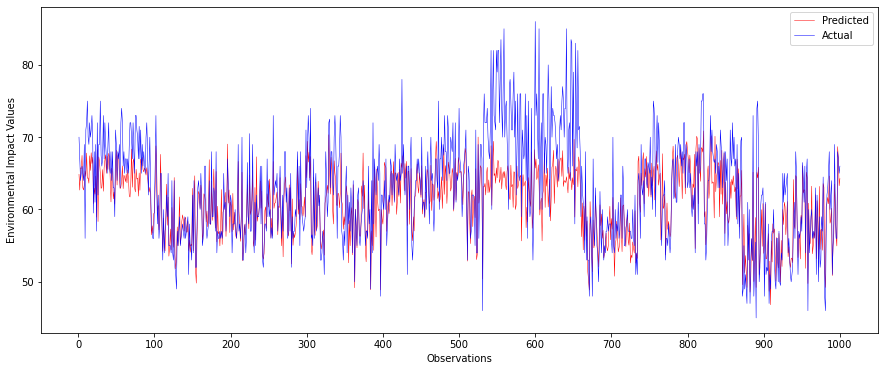

Mean Square Error: 22.56880173029445


In [10]:
x = np.arange(1,len(X_test)+1)
xgbr_predict = xgbr.predict(X_test)
fig = plt.figure(figsize=(15,6))
plt.plot(x,xgbr_predict[:],label="Predicted",linewidth=0.5,color="Red")
plt.plot(x,y_test[:],label = "Actual",linewidth=0.5,color="Blue")
plt.legend()
plt.xlabel("Observations")
plt.ylabel("Environmental Impact Values")
x_major_locator=MultipleLocator(100)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()
fig.savefig('2021_impact.png', dpi=fig.dpi)
print("Mean Square Error:", mean_squared_error(xgbr_predict,y_test))

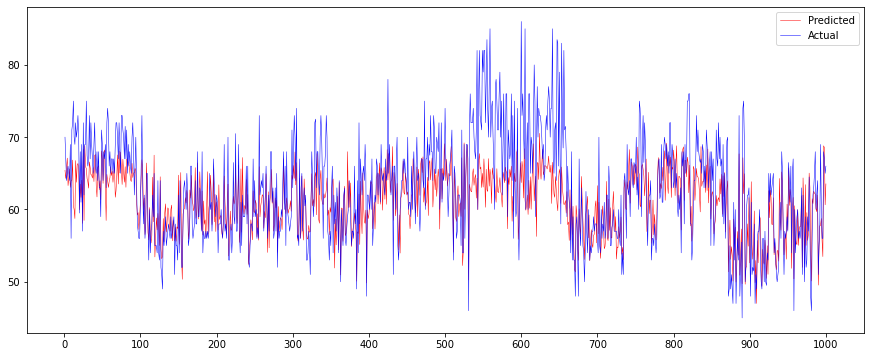

Mean Square Error: 25.780916083656003


In [29]:
x = np.arange(1,len(X_test)+1)
xgbr_predict = xgbr.predict(X_test)
fig = plt.figure(figsize=(15,6))
plt.plot(x,xgbr_predict[:],label="Predicted",linewidth=0.5,color="Red")
plt.plot(x,y_test[:],label = "Actual",linewidth=0.5,color="Blue")
plt.legend()
x_major_locator=MultipleLocator(100)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()
fig.savefig('2021_impact_10_features.png', dpi=fig.dpi)
print("Mean Square Error:", mean_squared_error(xgbr_predict,y_test))

In [31]:
np.sqrt(25.78092)

5.077491506639868

#### 3.4 Neural Networks

In [50]:
import torch.nn as nn
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
 
# Define the model
model = nn.Sequential(
    nn.Linear(30, 30),
    nn.ReLU(),
    nn.Linear(30, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = ExponentialLR(optimizer,gamma = 0.5)

In [51]:
import numpy as np
import copy
import torch
import tqdm
from sklearn.model_selection import train_test_split
 
# train-test split of the dataset
X_train, y_train = train.iloc[:,:-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:,:-1],test.iloc[:, -1]
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)
 
# training parameters
n_epochs = 1000   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            scheduler.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)

<All keys matched successfully>

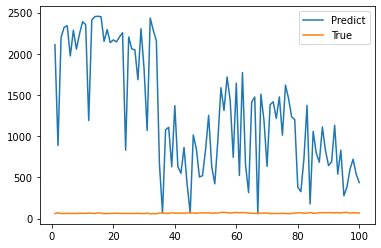

<Figure size 1440x432 with 0 Axes>

Mean Square Error: 1918154.5


In [52]:
num = 100
x = np.arange(1,num+1)
y_pred = model(X_test)
plt.plot(x,y_pred.detach().numpy()[:num],label="Predict")
plt.plot(x,y_test[:num],label = "True")
plt.legend()
plt.figure(figsize=(20,6))
plt.show()
print("Mean Square Error:", mean_squared_error(y_pred.detach().numpy(),y_test))

#### 3.5 Gradient Boosting

In [17]:
#Gradient Boosting
gbr_params = {'loss': 'huber',
      'criterion': 'mse', 
      'learning_rate': 0.1,
      'n_estimators': 10000, 
      'max_depth': 4,
      'subsample': 0.6,
      'min_samples_split': 20,
      'min_samples_leaf': 5,
      'max_features': 0.6,
      'random_state': 32,
      'alpha': 0.5}
gbr = GradientBoostingRegressor(**gbr_params)

In [18]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:,:-1],test.iloc[:, -1]
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.5, criterion='mse', loss='huber', max_depth=4,
                          max_features=0.6, min_samples_leaf=5,
                          min_samples_split=20, n_estimators=10000,
                          random_state=32, subsample=0.6)

In [19]:
train_score = gbr.score(X_train, y_train)
test_score = gbr.score(X_test,y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9478984445248516
Test score:  0.5113274396557563


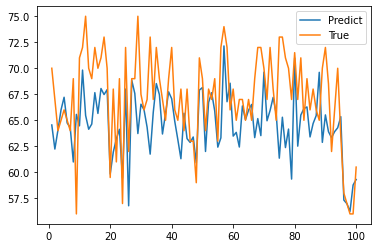

<Figure size 1440x432 with 0 Axes>

Mean Square Error: 23.52055971704133


In [20]:
num = 100
x = np.arange(1,num+1)
gbr_predict = gbr.predict(X_test)
plt.plot(x,gbr_predict[:num],label="Predict")
plt.plot(x,y_test[:num],label = "True")
plt.legend()
plt.figure(figsize=(20,6))
plt.show()
print("Mean Square Error:", mean_squared_error(gbr_predict,y_test))